# Détection de la position d'un usager par apprentissage artificielle

In [1]:
from src.plot import openImage
import matplotlib.pyplot as plt

In [2]:
ECHELLE = 100
image_batiment = openImage("./images/batiment.png")

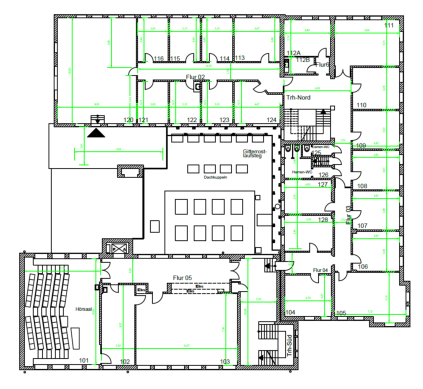

In [3]:
plt.imshow(image_batiment)
plt.axis('off')
plt.show()

#### Chargement des signaux collectés par position

In [4]:
from src.load import load_collected_positions_2d
P, D = load_collected_positions_2d("./datas/without_acces/BSSIDs_collected.csv")

#### Pretraitement des groupes de signaux

* Transformation des groupes de signaux en vecteur avec `DictVectorizer`
* Normalisation des vecteurs obtenus en utilisant `StandardScaler`

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

preModel = Pipeline(
    [("DicVect", DictVectorizer(sparse=False)), ("Scaler", StandardScaler())]
)
datas = preModel.fit_transform(D)
datas.shape

(97, 164)

#### Construction et choix du modèle le plus performant

Il est important que le modèle :
* Soit explicable
* Possède une inférence de complexité linéaire

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(datas, P, train_size=0.8)


model = RandomForestRegressor()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(score)

0.9845894322139828


#### Sauvegarde et utilisation du modèle le plus performant

In [7]:
model_complet = Pipeline([("preModel", preModel), ("model", model)])

In [8]:
# sauvegarde du model
from pickle import dump

with open('detect_model.pkl', 'wb') as files:
    dump(model_complet, files)

In [9]:
from src.load import load_collected_user
usager = load_collected_user("./datas/without_acces/BSSID_user.csv")

In [10]:
model_complet.predict(usager)

array([[5.47316424, 5.76015201]])

In [11]:
# chargement et utilisation du modèle sauvegardé
from pickle import load

with open('detect_model.pkl' , 'rb') as f:
    detect_model = load(f)


In [12]:
M = detect_model.predict(usager)[0]

[position détectée]  
 M (x : 5.473164238816739, y : 5.760152005772008)


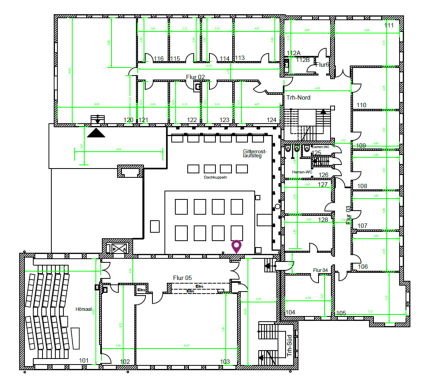

In [13]:
from src.plot import plot_position

print("[position détectée]  ")
print(f" M (x : {M[0]}, y : {M[1]})")

image = plot_position(
    M,
    None,
    "./images/pointeur_violet.png",
    image=image_batiment,
    echelle=ECHELLE,
    showed=False
)

plt.imshow(image)
plt.axis('off')
plt.show()